<a href="https://colab.research.google.com/github/dreico3600/AI6/blob/main/Session_01/02.%20Preprocesamiento%20de%20datos/AnalisisExploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de DATOS EDA

**¿Qué es el análisis exploratorio de datos?**

El análisis exploratorio de datos (*EDA, Exploratory Data Analysis*) es entender los datos resumiendo sus principales características, generalmente utilizando algún tipo de representación gráfica.
Un aspecto importante que me gusta siempre tener claro al empezar un EDA es saber el objetivo del mismo. Generalmente hay una lista de preguntas concretas que responder, o al menos las personas a cargo de recolectar el dataset lo crearon con un objetivo en mente. 
 Este es un paso muy importante para llegar a la modelización de los datos que luego se puede utilizar para aplicar Machine learning para algún tipo de análisis predictivo. Explorar los datos no es tarea sencilla, suele llevar una cantidad de tiempo considerable. A través del análisis exploratorio podemos definir claramente el problema.

**¿Qué datos vamos a explorar hoy?**

Hoy vamos a analizar datos sobre autos. El dataset tiene más de 10k registros con más de 10 columnas que detallan características de los autos como por ejemplo: el tipo de combustible que usan, la potencia del motor, la caja de trasmisión que usan, el consumo en ciudad y en ruta y mucho más. En este ejercicio vamos a explorar los datos y dejarlos listos para modelarlos.

## 1. Importamos los paquetes necesarios

A continuación tenemos los paquetes que vamos a utilizar en este ejercicio. Esto lo hacemos siempre al principio.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     


## 2. Cargamos la "data" en un "dataframe"

El dataset viene en un formato de archivo que se llama CSV (*comma separated values*). Es un archivo de texto plano donde cada registro se pone en una línea del mismo y cada columna es separada por comas. Es un formato muy simple que se utiliza muchísimo para el intercambio de datos. 

Cargar los datos en un *dataframe* es uno de los pasos más importantes en el análisis exploratorio. Pandas tiene un método que nos permite leer un archivo CSV y cargarlo directamente en un dataframe.

> **Google Colab**: para cargar el archivo CSV en Colab a la izquierda del notebook vas a ver un ícono de una carpeta. Si hacés click sobre esa carpeta te da la opción de subir el archivo. También podés ya tenerlo cargado en el Drive. 


Para leer el archivo tenemos que usar el método `read_csv` que viene con Pandas. Como argumento le tenemos que pasar el nombre del CSV, en este caso: `car-data.csv`. Como a Pandas lo importamos con el nombre `pd` tenemos que usar la siguiente sintaxis: 

In [ ]:
df = pd.read_csv("sample_data/california_housing_test.csv")

Si Python no nos tiró ningún error, entonces ahora en la variable `df` tenemos un *dataframe* que tiene los datos que se leyeron del CSV.

Para ver los primeros 5 registros usamos el método `head` (cabeza):

In [ ]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


Si queremos ver los últimos 5 registros, usamos `tail` (cola):

In [ ]:
df.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
2999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


Y también podemos usar la función `len` para que nos diga cuántos registros tiene este *dataframe*:

In [ ]:
len(df)

3000

También podemos usar el atributo `shape` del *dataframe* que nos va a devolver una tupla con la cantidad de registros y la cantidad de columnas por registro:

In [ ]:
df.shape

(3000, 9)

Y por último podemos usar el atributo `describe` del *dataframe* para conocer los estadísticos descriptivos básicos del dataframe como ser:

* count: Cantidad de valores no nulos
* mean: Media
* std: Desviación estandar
* min/25%/50%/75%/max: Valores mínimo, de percentiles 25, 50 y 75 y máximo.


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


## 3. Revisando los tipos de datos de cada columna

Este paso es importante porque muchas veces por ejemplo, el precio o algún otro dato puede venir como una cadena de texto cuando en realidad queremos que sea un número de algún tipo. Si éste fuera el caso, tenemos que hacer la transformación del tipo de dato en la columna. 

En este caso en particular, por suerte, los datos vinieron correctamente.

In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

## 4. Eliminando columnas

Es conveniente renombrar las columnas y darles un nombre descriptivo

Este paso es necesario en cada análisis exploratorio que vayas a realizar para evitar tener columnas en tu *dataframe* que no vayan a aportarte información en tu análisis. 

In [ ]:
df = df.drop(['households'], axis=1)
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,2.9375,81700.0


## 5. Renombrando las columnas

In [ ]:
df = df.rename(columns={
    "longitude":"longitud",
    "latitud":"latitude",
    "housing_median_age":"antiguedad",
    "total_rooms":"numero_cuartos",
    "median_house_value":"Precio",
    "total_bedrooms":"numero_dormitorios"
})

Verificamos el cambio

In [ ]:
df.head(5)

,longitud,latitude,antiguedad,numero_cuartos,total_bedrooms,population,median_income,Precio
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,2.9375,81700.0


## 6. Eliminando registros duplicados

Tener registros duplicados en nuestro análisis puede alterar los resultados y por ende, nuestras conclusiones y el modelo que proponemos.

Con `shape` vemos que actualmente el *dataframe* tiene 3000 registros con 8 columas.

In [ ]:
df.shape

(3000, 8)

Eliminar los duplicados con un *dataframe* de Pandas es tan complejo como llamar al método `drop_duplicates`. Este médoto nos devuelve un *nuevo dataframe*, si no queremos tener un nuevo *dataframe* lo que hacemos es simplemente darle el mismo nombre al nuevo:

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(3000, 8)

Registros con valores incompletos

Los *dataframes* de Pandas tienen un método `count` que nos informa por columna cuántos registros tienen valores:

In [ ]:
df.count()

longitud              3000
latitude              3000
antiguedad            3000
numero_cuartos        3000
total_bedrooms        3000
population            3000
median_income         3000
median_house_value    3000
dtype: int64

También podemos comprobarlo preguntándole al *dataframe* que nos diga si hay datos vacíos o en *null* y pidiéndole que nos haga la suma de esos:

In [ ]:
df.isnull().sum()

longitud              0
latitude              0
antiguedad            0
numero_cuartos        0
total_bedrooms        0
population            0
median_income         0
median_house_value    0
dtype: int64

Para borrar esos registros que no tienen datos, registros que tienen "datos no disponibles" (del inglés *not available*) usamos el método `dropna`.

In [ ]:
df = df.dropna()
df.count()

longitud              3000
latitude              3000
antiguedad            3000
numero_cuartos        3000
total_bedrooms        3000
population            3000
median_income         3000
median_house_value    3000
dtype: int64

Puedes rellenar todas las variables nulas con 0, si se trata de valor numéricos.
Puedes rellenar los valores perdidos con la media, media o el valor más frecuente de la columna.
También puedes decidir rellenar los valores que faltan con cualquier valor que venga directamente después en la misma columna.
Estas decisiones dependen del tipo de datos, de lo que se quiera hacer con ellos y de la causa de la falta de valores. En realidad, el hecho de que algo sea popular no significa necesariamente que sea la elección correcta. La estrategia más común es utilizar el valor medio, pero dependiendo de los datos, se puede llegar a un enfoque totalmente diferente.

Ahora nuestro dataset sabemos que no tiene registros duplicados y que todos nuestros registros tienen valores en las 10 columnas.

In [ ]:
df.isnull().sum()

longitud              0
latitude              0
antiguedad            0
numero_cuartos        0
total_bedrooms        0
population            0
median_income         0
median_house_value    0
dtype: int64



---



## 9. Detectando valores atípicos

Un valor atípico es un punto o un set de puntos que son diferentes de otros en el dataset. A veces puede ser valores que están muy por debajo o muy por encima. En general suele ser una buena medida quitar estos valores que no resultan representativos. Estos valores atípicos suelen generar modelos que no resultan representativos. Es por ello que es una buena alternativa removerlos del dataset.  

Abajo vemos cómo con Boxplot (o diagrama de cajas) podemos observar los valores atípicos rápidamente. 

Si quieren más info sobre cómo detectar valores atípicos pueden ver el siguiente artículo de [towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

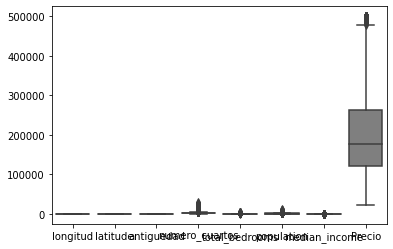

In [ ]:
sns.boxplot(data=df)

Analicemos por separado para evitar el sesgo de Precio

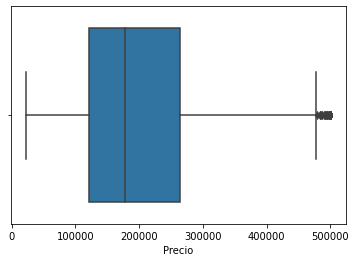

In [ ]:
sns.boxplot(x=df['Precio'])

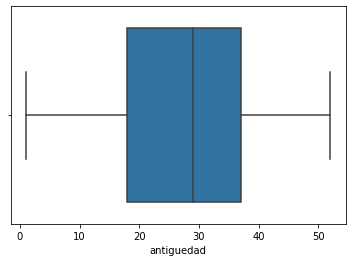

In [ ]:
sns.boxplot(x=df['antiguedad'])

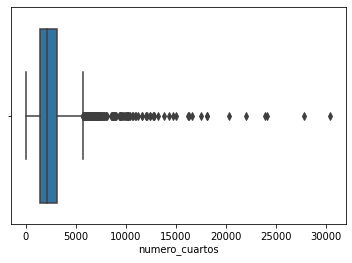

In [ ]:
sns.boxplot(x=df['numero_cuartos'])

Analicemos la disperción del precio que como se ve, tiene valores outliers:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count      3000.00000
mean     205846.27500
std      113119.68747
min       22500.00000
25%      121200.00000
50%      177650.00000
75%      263975.00000
max      500001.00000
Name: Precio, dtype: float64

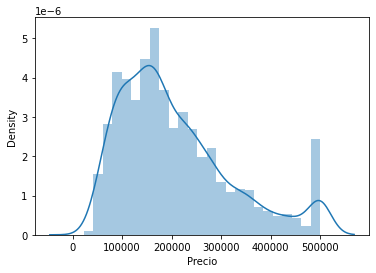

In [ ]:
sns.distplot(df['Precio'])
df['Precio'].describe()

Se observa que Precio tiene una larga cola hacia la derecha.

Analicemos los deciles y algunos percentiles para entender esos valores anómalos. Para esto, usaremos el método quantile para calcular los percentiles.

* Los cuartiles, que dividen a la distribución en cuatro partes (corresponden a los cuantiles 0,25; 0,50 y 0,75);
* Los quintiles, que dividen a la distribución en cinco partes (corresponden a los cuantiles 0,20; 0,40; 0,60 y 0,80);
* Los deciles, que dividen a la distribución en diez partes;
* Los percentiles, que dividen a la distribución en cien partes.
* En el método Quantile: 0, 0.5 y 1 equivalen a valores mínimo, mediana y máximo.

0.00     22500.0
0.10     84980.0
0.20    106400.0
0.30    135640.0
0.40    157360.0
0.50    177650.0
0.60    209440.0
0.70    241230.0
0.80    287500.0
0.90    372000.0
0.97    500001.0
0.98    500001.0
0.99    500001.0
1.00    500001.0
Name: Precio, dtype: float64

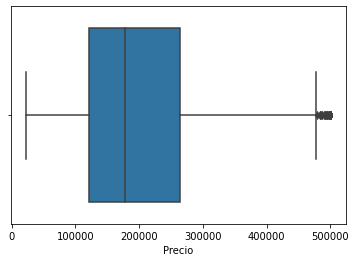

In [ ]:
sns.boxplot(x=df['Precio'])
df['Precio'].quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .97, .98, .99, 1])

Recortemos los outliers... por ejemplo, recortando entre 200 y el cuartil del 90% 

In [ ]:
corte_inferior = 200
corte_superior = df["Precio"].quantile(0.9)

df = df[(df["Precio"] < corte_superior) & (df["Precio"] > corte_inferior)]

Veamos cómo quedó la distribución después de eliminar los outliers:

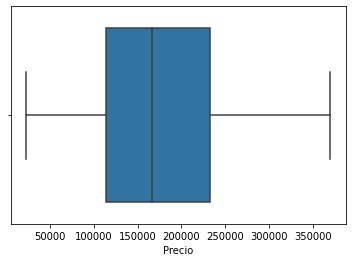

In [ ]:
sns.boxplot(x=df['Precio'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


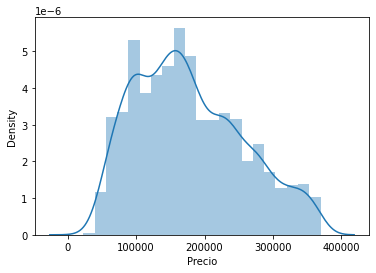

In [ ]:
sns.distplot(df['Precio'])

¿Cómo definimos el corte inferior? Mejor preguntemosle al área de negocio que nos pasó este set de datos.

## 10. Gráficas

### Histograma

El histograma es una gráfica que representa la cantidad de ocurrencias de una variable en un intervalo determinado. Este histograma es una solución trivial para saber cuántos casas por vecindad existen en el vecindario

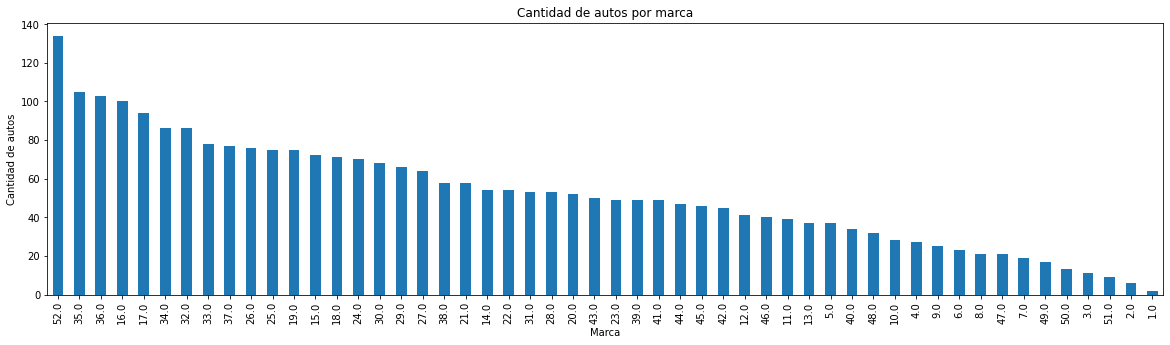

In [ ]:
df["antiguedad"].value_counts().plot(kind='bar', figsize=(20,5))
plt.title("Cantidad de autos por antiguedad")
plt.ylabel('Cantidad de casas')
plt.xlabel('Marca');

### Mapas de calor

Los mapas de calor son gráficas que sirven para determinar variables dependientes. Una de las mejores maneras para encontrar estas relaciones es utilizando un mapa de calor. En el siguiente mapa de calor encontramos que el precio es una característica dependiente del tamaño del motor, de la potencia y de la cantidad de cilindros.

,longitud,latitude,antiguedad,numero_cuartos,total_bedrooms,population,median_income,Precio
longitud,1.000000,-0.924321,-0.056948,0.055594,0.074001,0.115019,-0.009762,-0.025843
latitude,-0.924321,1.000000,-0.031206,-0.035731,-0.067811,-0.124508,-0.065206,-0.171244
antiguedad,-0.056948,-0.031206,1.000000,-0.390860,-0.348008,-0.299184,-0.235541,0.026830
numero_cuartos,0.055594,-0.035731,-0.390860,1.000000,0.946483,0.839215,0.230095,0.152246
total_bedrooms,0.074001,-0.067811,-0.348008,0.946483,1.000000,0.858494,0.048230,0.102712
population,0.115019,-0.124508,-0.299184,0.839215,0.858494,1.000000,0.075762,0.054833
median_income,-0.009762,-0.065206,-0.235541,0.230095,0.048230,0.075762,1.000000,0.605639
Precio,-0.025843,-0.171244,0.026830,0.152246,0.102712,0.054833,0.605639,1.000000


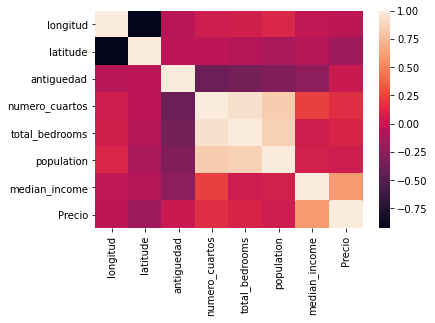

In [ ]:
correlaciones= df.corr()
sns.heatmap(correlaciones)
correlaciones

### Dispersión

Usamos este tipo de gráficas para encontrar correlación entre 2 variables. Acá graficamos precio en función de la potencia.

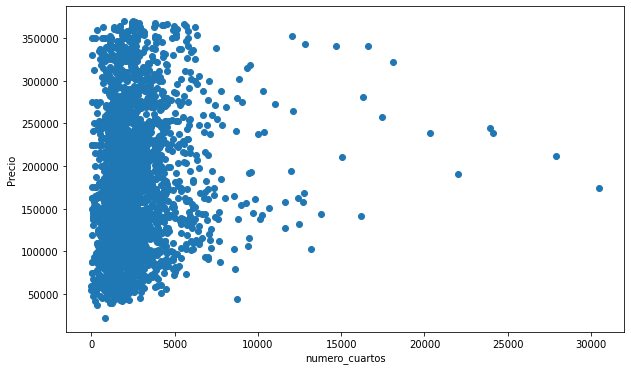

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['numero_cuartos'], df['Precio'])
ax.set_xlabel('numero_cuartos')
ax.set_ylabel('Precio')
plt.show()

Con la gráfica anterior vemos que se puede trazar claramente una línea de tendencia. 

**Como vimos a lo largo de este ejercicio estos son algunos de los pasos que podemos realizar para un análisis exploratorio de datos. Hay mucho más cosas para hacer, pero por ahora esto consideramos que representa una muy buena introducción que brinda un panorama bastante amplio sobre la disciplina.**

## Gracias!
